# Assignment 1: Approximation of mathematical functions

In [24]:
import math
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
def log1(x,n):
    sigma      = 0 
    minusPower = 1
    for i in range(1,n+1):
        sigma += (minusPower*((x-1)**i)/i)
        minusPower *= -1
   
    return sigma



 2. * Plot  `math.log` and `log1` for $0.25 ≤ x ≤ 4$ for $n=1,2,4,8$.   
    * Plot the **absolute** error of `log1` compared to `math.log` on $0.01 ≤ x ≤ 1$ for $n=1,8$. Use [plt.plot](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.plot.html): 

   


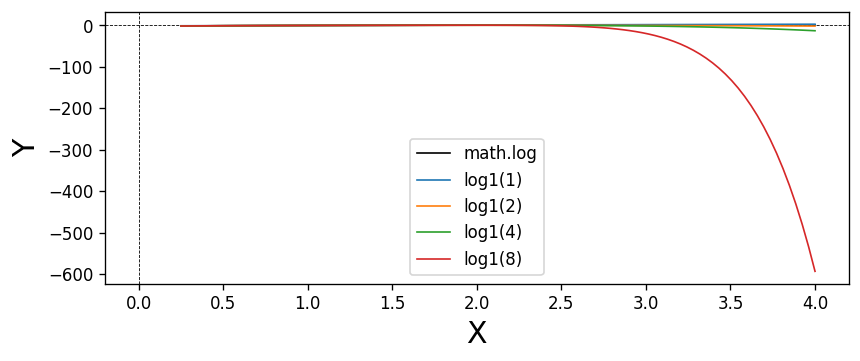

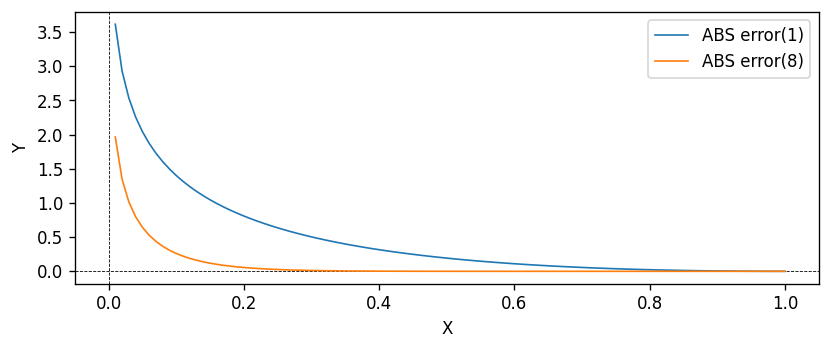

In [23]:
def plotFunction(f,g,lowerBound,upperBound,logN):
    scope = numpy.linspace(lowerBound,upperBound, 100) 
    plt.figure(figsize=(8, 3)).set_dpi(120)
    plt.axhline(0, ls='--', c='black', lw=0.5)
    plt.axvline(0, ls='--', c='black', lw=0.5)
    plt.xlabel('X', fontsize=18)
    plt.ylabel('Y', fontsize=18)
    y = [g(x) for x in scope ]
    plt.plot(scope, y, label="math.log", c='black', lw=1)
    for n in logN:
        y = [f(x,n) for x in scope ]
        plt.plot(scope, y, label="log1(%d)"% n,lw=1)
    plt.legend()

def plotAbsError(f,g,lowerBound,upperBound,logN):
    plt.figure(figsize=(8, 3)).set_dpi(120)
    plt.axhline(0, ls='--', c='black', lw=0.5)
    plt.axvline(0, ls='--', c='black', lw=0.5)
    scope = numpy.linspace(lowerBound,upperBound, 100) 
    plt.xlabel('X')
    plt.ylabel('Y')
    for n in logN:
        y = [float(abs(f(x,n)-g(x))) for x in scope ]
        plt.plot(scope, y, label="ABS error(%d)"% n,lw=1)
    plt.legend()
 

plotFunction(log1,math.log,0.25,4,[1,2,4,8])
plotAbsError(log1,math.log,0.01,1,[1,8])


3. Implement `log2` that approximates $\log(x),\,0 < x < \infty$. _Hint:_ $\log (e^N\cdot x) = N + \log x$.


In [26]:
def log2(x,n):
    e      = math.e
    N      = 0 
    while(x >= 2):
        x /= e
        N+=1
        
    return N+ log1(x,n)
    

 4. * Plot  `math.log` and `log2` for $0.1 ≤ x ≤ 100$ for $n=1,2,4,8$.   
    * Plot the **relative** error of `log2` compared to `math.log` on $0.1 ≤ x ≤ 100$ for $n=1,8$. Use [plt.plot](https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.plot.html): 



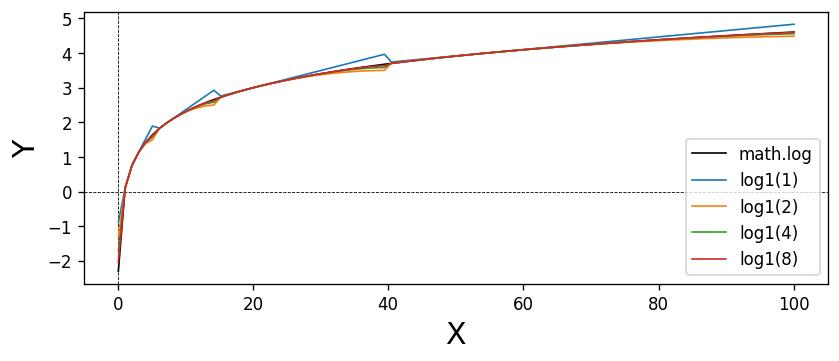

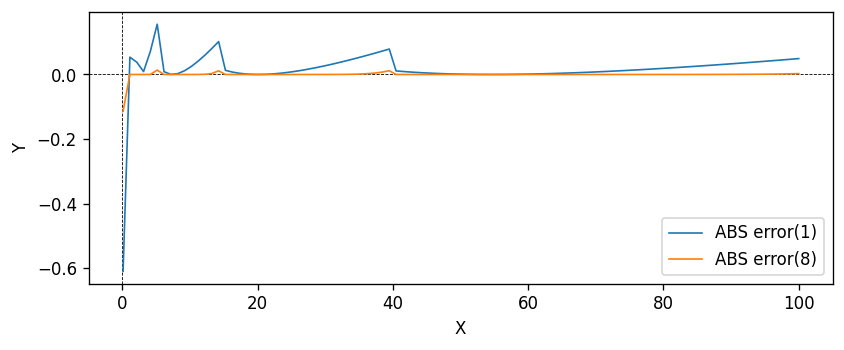

In [27]:
def plotRelativeError(f,g,lowerBound,upperBound,logN):
    plt.figure(figsize=(8, 3)).set_dpi(120)
    plt.axhline(0, ls='--', c='black', lw=0.5)
    plt.axvline(0, ls='--', c='black', lw=0.5)
    scope = numpy.linspace(lowerBound,upperBound, 100) 
    plt.xlabel('X')
    plt.ylabel('Y')
    for n in logN:
        y        = []
        for x in scope:
            measured = f(x,n)
            real     = g(x)
            y.append((abs(measured-real)/real))
        plt.plot(scope, y, label="ABS error(%d)"% n,lw=1)
    plt.legend()


plotFunction(log2,math.log,0.1,100,[1,2,4,8])
plotRelativeError(log2,math.log,0.1,100,[1,8])

5. What are the maximum absolute and relative errors of `log1` compared to `log2` on interval $0.25 ≤ x ≤ 1.75$? 

In [72]:
def maxErrors(f1,f2,g,lowerBound,upperBound,n):
    scope  = numpy.linspace(lowerBound,upperBound, 100)
    maxAbsLog1 = 0
    maxRelLog1 = 0 
    maxAbsLog2 = 0
    maxRelLog2 = 0 
    for x in scope:
        measuredLog1 = f1(x,n)
        measuredLog2 = f2(x,n)
        real         = g(x)
        if(abs(measuredLog1-real)>maxAbsLog1):
            maxAbsLog1 = abs(measuredLog1-real)
        if(abs(measuredLog1-real)/real*100 > maxRelLog1):
            maxRelLog1 = abs(measuredLog1-real)/real*100
        if(abs(measuredLog2-real)>maxAbsLog2):
            maxAbsLog2 = abs(measuredLog2-real)
        if(abs(measuredLog2-real)/real*100 > maxRelLog2):
            maxRelLog2 = abs(measuredLog2-real)/real*100

    print("The max absolute error of log1 is: " + str(maxAbsLog1))
    print("The max relative error of log1 is: " + str(maxRelLog1))
    print("The max absolute error of log2 is: " + str(maxAbsLog2))
    print("The max relative error of log2 is: " + str(maxRelLog2))

maxErrors(log1,log2,math.log,0.25,1.75,8)




The max absolute error of log1 is: 0.026610534128400642
The max relative error of log1 is: 0.8915914608317163
The max absolute error of log2 is: 0.026610534128400642
The max relative error of log2 is: 0.8915914608317163


## Question 2: Using approximate versions of  $\log$ and $\exp$

1. Use `logfact`  from [lecture 1 notebook](https://colab.research.google.com/drive/1PS2XZEKAhsV7Wq97Szk1RH93HWuhTyYF) with `math.log` and `math.exp`, to implement the [multinomial coefficients](https://en.wikipedia.org/wiki/Multinomial_theorem#Multinomial_coefficients) for $m=3$ on the log scale:

$$\binom{n}{k_1,k_2,...,k_m} = \frac{n!}{k_1! k_2! \cdot\cdot\cdot k_m!}$$


In [33]:
def logFact(n):
    logF = 0 
    for i in range(n):
        logF += math.log(i+1)
    return logF


def multinomialCoefficients(n,k1,k2,k3):
    return round(math.exp(logFact(n) - logFact(k1) - logFact(k2)- logFact(k3)))


2. Use `log2` from question 1 and `exp2` from the [lecture 2 notebook](https://colab.research.google.com/drive/1PAXmH_v6sQmbmAYrRK48eCfFQWLcQO3K) to implement the approximate computation of the multinomial coefficients for $m=3$:


In [73]:
e = 2.7182818284590455
def exp(x, n):
    v = 1       
    xi = x      
    fact = 1    
    for i in range(1, n+1):
        fact *= i       
        v += xi/fact    
        xi *= x         
    return v

def exp2(x, n):
  v = 1
  if x > 1:
    pow = int(x)   
    v *= e**pow    
    x -= pow       
  elif x < -1:
    pow = int(-x)
    v /= e**pow
    x += pow
  v *= exp(x, n)   
                  
  return v

def logfact2(n , taylorN):
  logf = 0
  for i in range(n):
    logf += log2(i + 1,taylorN)
  return logf


def multinomialCoefficients2(n,k1,k2,k3,taylorN):
    return round(exp2(logfact2(n,taylorN) - logfact2(k1,taylorN) - logfact2(k2,taylorN)- logfact2(k3,taylorN),taylorN))

3. Compute $\binom{10}{2,2,6}$, and $\binom{150}{100, 25,25}$. Compare the running times of `multinomial coefficients` using `log2` and `exp2` vs. `math.log` and `math.exp`.


In [74]:
taylorN = 8
%time print ("(10,2,2,6)'s multinomial Coefficients using math.log and math.exp is :"      + str(multinomialCoefficients(10,2,2,6)))
%time print ("(10,2,2,6)'s multinomial Coefficients using log2 and exp2 is :"              + str(multinomialCoefficients2(10,2,2,6,taylorN)))
%time print ("(150,100,25,25)'s multinomial Coefficients using math.log and math.exp is :" + str(multinomialCoefficients(150,100,25,25)))
%time print ("(150,100,25,25)'s multinomial Coefficients using log2 and exp2 is :"         + str(multinomialCoefficients2(150,100,25,25,taylorN)))



(10,2,2,6)'s multinomial Coefficients using math.log and math.exp is :1260
CPU times: total: 0 ns
Wall time: 0 ns
(10,2,2,6)'s multinomial Coefficients using log2 and exp2 is :1260
CPU times: total: 0 ns
Wall time: 0 ns
(150,100,25,25)'s multinomial Coefficients using math.log and math.exp is :2544476232379045785963458409835886714436879363285712896
CPU times: total: 0 ns
Wall time: 0 ns
(150,100,25,25)'s multinomial Coefficients using log2 and exp2 is :2074562095840179158738772251989639914311438121182429184
CPU times: total: 0 ns
Wall time: 998 µs


4. What are the absolute and relative error of `multinomial coefficients` for each combination of arguments — $\binom{10}{2,2,6}$, and $\binom{150}{100, 25,25}$?


In [62]:
'''absolute relative error of (10,2,2,6)'''
taylorN = 8
measured = multinomialCoefficients2(10,2,2,6,taylorN)
real     = multinomialCoefficients(10,2,2,6)
print("The absolute  error of (10,2,2,6) is: " + str(abs(measured-real)))
print("The absolute relative error of (10,2,2,6) is: " + str((abs(measured-real)/real)*100))


The absolute  error of (10,2,2,6) is: 0
The absolute relative error of (10,2,2,6) is: 0.0


In [75]:
'''absolute relative error of (150,100,25,25)'''
taylorN  = 8
measured = multinomialCoefficients2(150,100,25,25,taylorN)
real     = multinomialCoefficients(150,100,25,25)
print("The absolute  error of (150,100,25,25)) is: " + str(abs(measured-real)))
print("The absolute relative error of (150,100,25,25) is: " + str((abs(measured-real)/real)*100))

The absolute  error of (150,100,25,25)) is: 469914136538866627224686157846246800125441242103283712
The absolute relative error of (150,100,25,25) is: 18.468010451781826


5. For which $n$(number of Taylor series terms) the absolute difference between the *relative errors* of $\binom{1000}{900, 50,50}$ computed for `n` and `n+1` is smaller than 0.1%? Use the approximation from Q2.2 

In [76]:
n     = 0 
found = False
while (not found):
    measured         = multinomialCoefficients2(1000,900,50,50,n)
    measuredNext     = multinomialCoefficients2(1000,900,50,50,n+1)
    real             = multinomialCoefficients(1000,900,50,50)
    realErrorCurrent = (abs(measured-real)/real) *100
    realErrorNext    = (abs(measuredNext-real)/real) *100
    if (abs(realErrorCurrent - realErrorNext)<0.1):
        found = True
        n     = n-1
    n+=1


print(n)
    

13
